In [1]:
import numpy as np
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
image_size = (224, 224)
batch_size = 32
num_classes = 38

In [3]:
train_dir = "train" 
test_dir = "test"

In [4]:
# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation and preprocessing for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
# Load training data from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load testing data from directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 21834 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# Compile the model
opt = Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=test_generator,  
    validation_steps=len(test_generator)
)

Epoch 1/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 3908s 6s/step - accuracy: 0.0558 - loss: 3.5688 - val_accuracy: 0.0712 - val_loss: 3.2825
Epoch 2/40


c:\Users\hp\Downloads\leafdataset\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


683/683 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 3380s 5s/step - accuracy: 0.1240 - loss: 3.1755 - val_accuracy: 0.1920 - val_loss: 2.9650
Epoch 4/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 3108s 5s/step - accuracy: 0.2001 - loss: 2.9079 - val_accuracy: 0.2104 - val_loss: 2.8009
Epoch 6/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 2897s 4s/step - accuracy: 0.2475 - loss: 2.6719 - val_accuracy: 0.2334 - val_loss: 2.7055
Epoch 8/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/40
683/683 ━━━━━━━━━━━━━━━━━━━━ 

In [11]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
# Print the accuracy
print("Test Accuracy:", accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 1002s 2s/step - accuracy: 0.3748 - loss: 2.1534
Test Accuracy: 0.3742317259311676


In [14]:
print("Test Accuracy for Resnet :", accuracy*100)

Test Accuracy for Resnet : 37.42317259311676


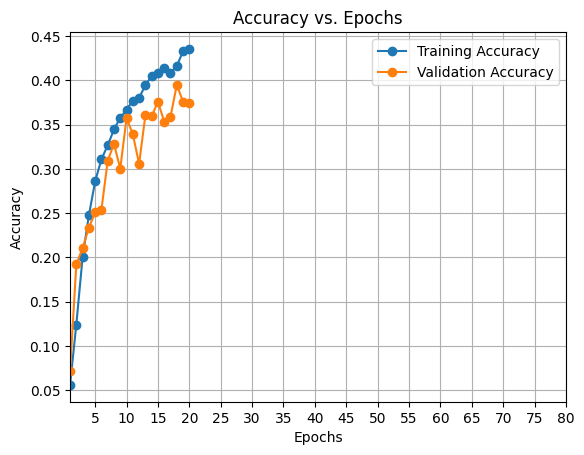

In [25]:
import matplotlib.pyplot as plt

# Define the epoch data
epoch_data = [
    
    {'accuracy': 0.0558, 'loss': 3.5688, 'val_accuracy': 0.0712, 'val_loss': 3.2825},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.1240, 'loss': 3.1755, 'val_accuracy': 0.1920, 'val_loss': 2.9650},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.2001, 'loss': 2.9079, 'val_accuracy': 0.2104, 'val_loss': 2.8009},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.2475, 'loss': 2.6719, 'val_accuracy': 0.2334, 'val_loss': 2.7055},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.2859, 'loss': 2.5170, 'val_accuracy': 0.2510, 'val_loss': 2.6460},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3110, 'loss': 2.3904, 'val_accuracy': 0.2538, 'val_loss': 2.6165},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3266, 'loss': 2.3285, 'val_accuracy': 0.3092, 'val_loss': 2.3704},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3446, 'loss': 2.2445, 'val_accuracy': 0.3283, 'val_loss': 2.2853},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3580, 'loss': 2.2022, 'val_accuracy': 0.3004, 'val_loss': 2.4308},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3670, 'loss': 2.1585, 'val_accuracy': 0.3573, 'val_loss': 2.2371},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3773, 'loss': 2.1157, 'val_accuracy': 0.3394, 'val_loss': 2.3041},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3805, 'loss': 2.0839, 'val_accuracy': 0.3057, 'val_loss': 2.4166},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.3944, 'loss': 2.0613, 'val_accuracy': 0.3607, 'val_loss': 2.2019},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.4052, 'loss': 2.0106, 'val_accuracy': 0.3594, 'val_loss': 2.2109},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.4080, 'loss': 2.0010, 'val_accuracy': 0.3762, 'val_loss': 2.1705},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.4136, 'loss': 1.9735, 'val_accuracy': 0.3533, 'val_loss': 2.2498},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.4086, 'loss': 1.9683, 'val_accuracy': 0.3589, 'val_loss': 2.2493},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.4163, 'loss': 1.9550, 'val_accuracy': 0.3948, 'val_loss': 2.0894},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.4331, 'loss': 1.8958, 'val_accuracy': 0.3762, 'val_loss': 2.1691},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0},
    {'accuracy': 0.4357, 'loss': 1.8830, 'val_accuracy': 0.3742, 'val_loss': 2.1488},
    {'accuracy': 0.0, 'loss': 0.0, 'val_accuracy': 0.0, 'val_loss': 0.0}
]

import matplotlib.pyplot as plt

def plot_accuracy_from_epochs(epoch_data):
    training_accuracy = []
    validation_accuracy = []
    
    for epoch in epoch_data:
        training_acc = epoch['accuracy']
        val_acc = epoch['val_accuracy']
        
        if training_acc != 0.0 and val_acc != 0.0:
            training_accuracy.append(training_acc)
            validation_accuracy.append(val_acc)

    epochs = range(1, 81)  # Extend range to cover up to 80 epochs

    plt.plot(epochs[:len(training_accuracy)], training_accuracy, label='Training Accuracy', marker='o')
    plt.plot(epochs[:len(validation_accuracy)], validation_accuracy, label='Validation Accuracy', marker='o')

    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(5, 81, 5))  # Set x-ticks to cover 5, 10, 15, 20, ..., 80 epochs
    plt.grid(True)
    plt.legend()
    plt.xlim(1, 80)  # Set x-axis limit to cover the entire range
    plt.show()

plot_accuracy_from_epochs(epoch_data)



In [26]:

model_path = "saved_models/modelresnet.keras"
model.save(model_path)
print("Model saved successfully at", model_path)


Model saved successfully at saved_models/modelresnet.keras
